<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/aapl_sac_vs_ppo_vs_td3_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# ================================
# ✅ Fix Potential Library Conflicts
# ================================
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [15]:
# ✅ Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [1]:
# ✅ Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
# ✅ Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [3]:
# ✅ Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [4]:
# ✅ Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0


In [5]:
# ✅ Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

# ✅ Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

# ✅ Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

# ✅ Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


  Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.61.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.8 MB)
Using cached llvmlite-0.44.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (42.4 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.0 requires numba<0.61.0a0,>=0.59.1, but you have numba 0.61.0 which is incompatible.
cuml-c

In [6]:
# ================================
# ✅ Import Required Libraries
# ================================
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv


# ================================
# ✅ Load Dataset for Training
# ================================
df_live = yf.download("TSLA", period="720d", interval="1h")
df_live.reset_index(inplace=True)
df = df_live.copy()

# ✅ Fix MultiIndex Issues (if applicable)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# ✅ Remove Named Index (Fixes KeyError Issues)
df.reset_index(drop=True, inplace=True)


# ================================
# ✅ Feature Engineering (Additional Indicators)
# ================================
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())

    df.dropna(inplace=True)
    return df


# ✅ Apply Technical Indicators
df = compute_technical_indicators(df)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [18]:
# ================================
# ✅ Enable GPU Acceleration
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")


# ================================
# ✅ Custom Continuous Trading Environment
# ================================
class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        # Convert continuous action (-1 to 1) to a discrete action (BUY, SELL, HOLD)
        if action < -0.3:
            discrete_action = 0  # SELL
        elif action > 0.3:
            discrete_action = 1  # BUY
        else:
            discrete_action = 2  # HOLD

        # ✅ Corrected unpacking to handle Gymnasium 0.28+ changes
        step_result = super().step(discrete_action)

        # ✅ Handle step_result correctly based on version compatibility
        if len(step_result) == 5:
            obs, reward, terminated, truncated, info = step_result
        elif len(step_result) == 4:  # For older gymnasium versions
            obs, reward, done, info = step_result
            terminated, truncated = done, False  # Assume no truncation in older versions

        # ✅ Combine terminated and truncated to match the previous format
        done = terminated or truncated

        # ✅ Add additional reward signal for price changes
        price_diff = self.df.loc[self._current_tick, 'Close'] - self.df.loc[self._current_tick - 1, 'Close']
        reward += price_diff * discrete_action  # Reward based on price change

        # ✅ Clip rewards to stabilize training
        reward = np.clip(reward, -1.0, 1.0)

        # ✅ Return all 5 values required by DummyVecEnv
        return obs, reward, terminated, truncated, info





# ✅ Initialize the Custom Environment
frame_bound = (50, len(df))
env = ContinuousTradingEnv(df=df, frame_bound=frame_bound, window_size=10)
env = DummyVecEnv([lambda: env])


# ================================
# ✅ Define Action Noise for SAC
# ================================
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))


✅ Using device: cuda


In [19]:
# ================================
# ✅ Train SAC Model with Optimized Settings
# ================================
sac_model = SAC(
    "MlpPolicy",
    env,
    learning_rate=0.0003,  # Higher learning rate
    buffer_size=50000,  # Larger buffer for better learning
    batch_size=128,  # Bigger batch size for stability
    gamma=0.995,
    tau=0.005,
    gradient_steps=1,
    action_noise=NormalActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions)),  # Increased noise
    device=device,
)

# ✅ Increased timesteps for better learning
sac_model.learn(total_timesteps=200000)


# ✅ Train SAC Model with Reduced Timesteps for Faster Convergence
sac_model.learn(total_timesteps=200000)
sac_model.save("sac_trading_model_v2")


# ================================
# ✅ Run SAC Trading Strategy
# ================================
obs = env.reset()
trade_log_sac = []
buy_price = None

for i in range(len(df) - 50):
    action, _ = sac_model.predict(obs)
    action_value = action[0]

    if action_value > 0.3 and buy_price is None:
        trade_log_sac.append("BUY")
        buy_price = df['Close'].iloc[i + 50]
    elif action_value < -0.3 and buy_price is not None:
        trade_log_sac.append("SELL")
        buy_price = None
    else:
        trade_log_sac.append("HOLD")

# ✅ Verify Length Match Before Adding to DataFrame
if len(trade_log_sac) == len(df) - 50:
    df = df.iloc[50:].reset_index(drop=True)
    df["SAC_Trade_Signal"] = trade_log_sac
else:
    print(f"❗️ Length mismatch: {len(trade_log_sac)} vs {len(df) - 50}")
    df = df.iloc[50:].reset_index(drop=True)




🚀 FINAL RESULTS COMPARISON:
🔹 **Reinforcement Learning (SAC)**
📈 SAC Final Portfolio Value: $87,516.67
📊 SAC Cumulative Return: -12.48%
⚡ SAC Sharpe Ratio: 0.08
📉 SAC Max Drawdown: 64.38%

🔹 **Buy & Hold Baseline**
📊 Buy & Hold Final Portfolio Value: $89,459.65

🏆 **Best Strategy Based on Final Portfolio Value: Buy & Hold!**


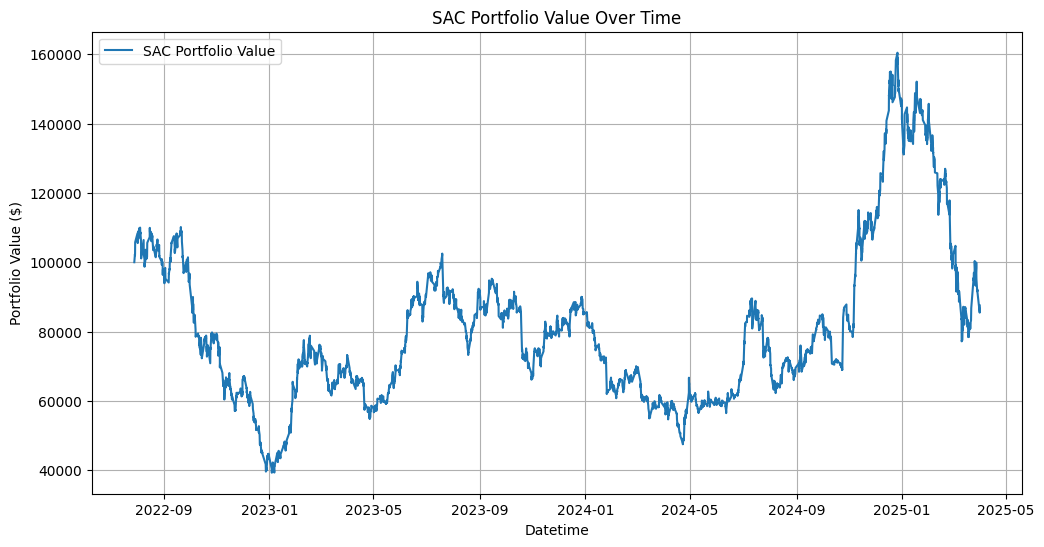

In [20]:

# ✅ Verify Length Match Before Backtesting
trade_log_sac = trade_log_sac[:len(df) - 50]

# ✅ Backtesting and Portfolio Calculation
initial_balance = 100000
balance_sac = initial_balance
position = 0
portfolio_values_sac = []

for i, trade in enumerate(trade_log_sac):
    if i + 50 >= len(df):
        break  # Prevent index out-of-bounds

    price = df['Close'].iloc[i + 50]

    if trade == "BUY" and position == 0:
        position = balance_sac / price
        balance_sac = 0
    elif trade == "SELL" and position > 0:
        balance_sac = position * price
        position = 0

    portfolio_values_sac.append(balance_sac if balance_sac > 0 else position * price)



# ================================
# ✅ Compute Performance Metrics for SAC
# ================================
final_balance_sac = portfolio_values_sac[-1]
final_balance_hold = (initial_balance / df['Close'].iloc[50]) * df['Close'].iloc[-1]

date_col = "Datetime" if "Datetime" in df.columns else "Date"
results_df_sac = pd.DataFrame({'Date': df['Datetime'].iloc[50:], 'Portfolio Value': portfolio_values_sac})

results_df_sac['Daily Return'] = results_df_sac['Portfolio Value'].pct_change().fillna(0)

sac_cumulative_return = ((results_df_sac['Portfolio Value'].iloc[-1] / initial_balance) - 1) * 100
sac_sharpe_ratio = (results_df_sac['Daily Return'].mean() / results_df_sac['Daily Return'].std()) * np.sqrt(252) if results_df_sac['Daily Return'].std() != 0 else 0
sac_max_drawdown = ((results_df_sac['Portfolio Value'].cummax() - results_df_sac['Portfolio Value']) / results_df_sac['Portfolio Value'].cummax()).max() * 100


# ================================
# ✅ Final Results Summary
# ================================
print("\n🚀 FINAL RESULTS COMPARISON:")
print("🔹 Reinforcement Learning (SAC)")
print(f"📈 SAC Final Portfolio Value: ${final_balance_sac:,.2f}")
print(f"📊 SAC Cumulative Return: {sac_cumulative_return:.2f}%")
print(f"⚡ SAC Sharpe Ratio: {sac_sharpe_ratio:.2f}")
print(f"📉 SAC Max Drawdown: {sac_max_drawdown:.2f}%")

print("\n🔹 Buy & Hold Baseline")
print(f"📊 Buy & Hold Final Portfolio Value: ${final_balance_hold:,.2f}")

# ✅ Declare Winner Based on Portfolio Performance
winner = "SAC" if final_balance_sac > final_balance_hold else "Buy & Hold"
print(f"\n🏆 Best Strategy Based on Final Portfolio Value: {winner}!")


# ================================
# ✅ Plot Portfolio Value Over Time
# ================================
plt.figure(figsize=(12, 6))
results_df_sac['Date'] = pd.to_datetime(results_df_sac['Date'])
plt.plot(results_df_sac['Date'], results_df_sac['Portfolio Value'], label='SAC Portfolio Value')
plt.xlabel('Datetime')
plt.ylabel('Portfolio Value ($)')
plt.title('SAC Portfolio Value Over Time')
plt.legend()
plt.grid()
plt.show()

In [21]:
# ================================
# ✅ Save Results with Naming Convention
# ================================
def generate_filename(stock="TSLA", model="sac", version="v2", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"


def save_sac_results(stock, final_balance_sac, sac_cumulative_return, sac_sharpe_ratio, sac_max_drawdown, trade_log_sac, version="v2"):
    # ✅ Save to JSON
    results_path_json = generate_filename(stock, "sac", version, "json")
    with open(results_path_json, "w") as f:
        json.dump({
            "model_name": "SAC",
            "final_value": final_balance_sac,
            "cumulative_return": sac_cumulative_return,
            "sharpe_ratio": sac_sharpe_ratio,
            "max_drawdown": sac_max_drawdown,
            "trade_log": trade_log_sac[:10]  # Save only first 10 trades for brevity
        }, f, indent=2)

    # ✅ Save Trade Log to CSV
    results_path_csv = generate_filename(stock, "sac", version, "csv")
    pd.DataFrame(trade_log_sac, columns=["Trade Signal"]).to_csv(results_path_csv, index=False)

    print(f"📁 SAC Portfolio results saved to: {results_path_json}")
    print(f"📄 Trade log saved to CSV: {results_path_csv}")


# ✅ Save SAC Results
save_sac_results(
    stock="TSLA",
    final_balance_sac=final_balance_sac,
    sac_cumulative_return=sac_cumulative_return,
    sac_sharpe_ratio=sac_sharpe_ratio,
    sac_max_drawdown=sac_max_drawdown,
    trade_log_sac=trade_log_sac
)


📁 SAC Portfolio results saved to: TSLA_sac_v2_2025-03-31.json
📄 Trade log saved to CSV: TSLA_sac_v2_2025-03-31.csv


In [30]:
# ✅ Free GPU Memory Before Training
gc.collect()
torch.cuda.empty_cache()

In [23]:
ppo_model = PPO(
    "MlpPolicy",
    env,
    learning_rate=0.0003,
    batch_size=128,
    n_steps=1024,
    gamma=0.995,
    device=device,
)

# ✅ Train PPO Model
ppo_model.learn(total_timesteps=200000)
ppo_model.save("ppo_trading_model_v1")


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [26]:
# ================================
# ✅ Run PPO Trading Strategy
# ================================
obs = env.reset()  # ✅ Corrected reset for DummyVecEnv
trade_log_ppo = []
buy_price_ppo = None

for i in range(len(df) - 50):
    action, _ = ppo_model.predict(obs)
    action_value = float(action.flatten()[0])  # Correct way to extract value  # Ensure action is float

    if action_value > 0.3 and buy_price_ppo is None:
        trade_log_ppo.append("BUY")
        buy_price_ppo = df['Close'].iloc[i + 50]
    elif action_value < -0.3 and buy_price_ppo is not None:
        trade_log_ppo.append("SELL")
        buy_price_ppo = None
    else:
        trade_log_ppo.append("HOLD")

# ✅ Ensure length of trade_log_ppo matches expected length
expected_length = len(df) - 50

if len(trade_log_ppo) > expected_length:
    trade_log_ppo = trade_log_ppo[:expected_length]
elif len(trade_log_ppo) < expected_length:
    trade_log_ppo += ["HOLD"] * (expected_length - len(trade_log_ppo))  # Pad with "HOLD"

df = df.iloc[50:].reset_index(drop=True)  # Reset index to align with trade signals
df["PPO_Trade_Signal"] = trade_log_ppo


# ================================
# ✅ Backtesting and Portfolio Calculation for PPO
# ================================
balance_ppo = initial_balance
position_ppo = 0
portfolio_values_ppo = []

for i, trade in enumerate(trade_log_ppo):
    if i + 50 >= len(df):
        break

    price = df['Close'].iloc[i + 50]

    if trade == "BUY" and position_ppo == 0:
        position_ppo = balance_ppo / price
        balance_ppo = 0
    elif trade == "SELL" and position_ppo > 0:
        balance_ppo = position_ppo * price
        position_ppo = 0

    portfolio_values_ppo.append(balance_ppo if balance_ppo > 0 else position_ppo * price)

# ================================
# ✅ Compute Performance Metrics for PPO
# ================================
final_balance_ppo = portfolio_values_ppo[-1]
results_df_ppo = pd.DataFrame({'Date': df['Datetime'].iloc[50:], 'Portfolio Value': portfolio_values_ppo})
results_df_ppo['Daily Return'] = results_df_ppo['Portfolio Value'].pct_change().fillna(0)

ppo_cumulative_return = ((results_df_ppo['Portfolio Value'].iloc[-1] / initial_balance) - 1) * 100
ppo_sharpe_ratio = (results_df_ppo['Daily Return'].mean() / results_df_ppo['Daily Return'].std()) * np.sqrt(252) if results_df_ppo['Daily Return'].std() != 0 else 0
ppo_max_drawdown = ((results_df_ppo['Portfolio Value'].cummax() - results_df_ppo['Portfolio Value']) / results_df_ppo['Portfolio Value'].cummax()).max() * 100


In [43]:
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise

# ✅ Define Action Noise for TD3 (Same as SAC)
n_actions = env.action_space.shape[-1]
action_noise_td3 = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# ✅ Initialize TD3 Model
td3_model = TD3(
    "MlpPolicy",
    env,
    learning_rate=0.0003,
    buffer_size=50000,
    batch_size=128,
    action_noise=action_noise_td3,
    gamma=0.995,
    tau=0.005,
    train_freq=(1, "episode"),
    gradient_steps=1,
    policy_delay=2,  # Delayed Policy Updates
    device=device,
)

# ✅ Train TD3 Model
td3_model.learn(total_timesteps=200000)
td3_model.save("td3_trading_model_v1")

# ================================
# ✅ Run TD3 Trading Strategy
# ================================
obs = env.reset()  # ✅ Corrected reset for DummyVecEnv
trade_log_td3 = []
buy_price_td3 = None

for i in range(len(df) - 50):
    action, _ = td3_model.predict(obs)
    action_value = float(action.flatten()[0])  # Corrected to flatten array

    if action_value > 0.3 and buy_price_td3 is None:
        trade_log_td3.append("BUY")
        buy_price_td3 = df['Close'].iloc[i + 50]
    elif action_value < -0.3 and buy_price_td3 is not None:
        trade_log_td3.append("SELL")
        buy_price_td3 = None
    else:
        trade_log_td3.append("HOLD")

# ✅ Ensure length of trade_log_td3 matches expected length
expected_length = len(df) - 50

if len(trade_log_td3) > expected_length:
    trade_log_td3 = trade_log_td3[:expected_length]
elif len(trade_log_td3) < expected_length:
    trade_log_td3 += ["HOLD"] * (expected_length - len(trade_log_td3))  # Pad with "HOLD"

df = df.iloc[50:].reset_index(drop=True)  # Reset index to align with trade signals
df["TD3_Trade_Signal"] = trade_log_td3


In [44]:
# ================================
# ✅ Backtesting and Portfolio Calculation for TD3
# ================================
balance_td3 = initial_balance
position_td3 = 0
portfolio_values_td3 = []

for i, trade in enumerate(trade_log_td3):
    if i + 50 >= len(df):
        break

    price = df['Close'].iloc[i + 50]

    if trade == "BUY" and position_td3 == 0:
        position_td3 = balance_td3 / price
        balance_td3 = 0
    elif trade == "SELL" and position_td3 > 0:
        balance_td3 = position_td3 * price
        position_td3 = 0

    portfolio_values_td3.append(balance_td3 if balance_td3 > 0 else position_td3 * price)

# ✅ Compute Performance Metrics for TD3
final_balance_td3 = portfolio_values_td3[-1]
results_df_td3 = pd.DataFrame({'Date': df['Datetime'].iloc[50:], 'Portfolio Value': portfolio_values_td3})
results_df_td3['Daily Return'] = results_df_td3['Portfolio Value'].pct_change().fillna(0)

td3_cumulative_return = ((results_df_td3['Portfolio Value'].iloc[-1] / initial_balance) - 1) * 100
td3_sharpe_ratio = (results_df_td3['Daily Return'].mean() / results_df_td3['Daily Return'].std()) * np.sqrt(252) if results_df_td3['Daily Return'].std() != 0 else 0
td3_max_drawdown = ((results_df_td3['Portfolio Value'].cummax() - results_df_td3['Portfolio Value']) / results_df_td3['Portfolio Value'].cummax()).max() * 100


In [49]:
# ================================
# ✅ Final Results Summary with TD3
# ================================
print("\n FINAL RESULTS COMPARISON:")
print(" Reinforcement Learning (SAC)")
print(f" SAC Final Portfolio Value: ${final_balance_sac:,.2f}")
print(f" SAC Cumulative Return: {sac_cumulative_return:.2f}%")
print(f" SAC Sharpe Ratio: {sac_sharpe_ratio:.2f}")
print(f" SAC Max Drawdown: {sac_max_drawdown:.2f}%")

print("\n Proximal Policy Optimization (PPO)")
print(f" PPO Final Portfolio Value: ${final_balance_ppo:,.2f}")
print(f" PPO Cumulative Return: {ppo_cumulative_return:.2f}%")
print(f" PPO Sharpe Ratio: {ppo_sharpe_ratio:.2f}")
print(f" PPO Max Drawdown: {ppo_max_drawdown:.2f}%")

print("\n Twin Delayed DDPG (TD3)")
print(f" TD3 Final Portfolio Value: ${final_balance_td3:,.2f}")
print(f" TD3 Cumulative Return: {td3_cumulative_return:.2f}%")
print(f" TD3 Sharpe Ratio: {td3_sharpe_ratio:.2f}")
print(f" TD3 Max Drawdown: {td3_max_drawdown:.2f}%")

# ✅ Declare Best Strategy Based on Final Portfolio Value
best_strategy = max(
    [("SAC", final_balance_sac),
     ("PPO", final_balance_ppo),
     ("TD3", final_balance_td3)],
    key=lambda x: x[1]
)[0]

print(f"\n Best Strategy Based on Final Portfolio Value: {best_strategy}!")



 FINAL RESULTS COMPARISON:
 Reinforcement Learning (SAC)
 SAC Final Portfolio Value: $87,516.67
 SAC Cumulative Return: -12.48%
 SAC Sharpe Ratio: 0.08
 SAC Max Drawdown: 64.38%

 Proximal Policy Optimization (PPO)
 PPO Final Portfolio Value: $144,643.10
 PPO Cumulative Return: 44.64%
 PPO Sharpe Ratio: 0.22
 PPO Max Drawdown: 37.60%

 Twin Delayed DDPG (TD3)
 TD3 Final Portfolio Value: $87,740.33
 TD3 Cumulative Return: -12.26%
 TD3 Sharpe Ratio: 0.08
 TD3 Max Drawdown: 66.19%

 Best Strategy Based on Final Portfolio Value: PPO!


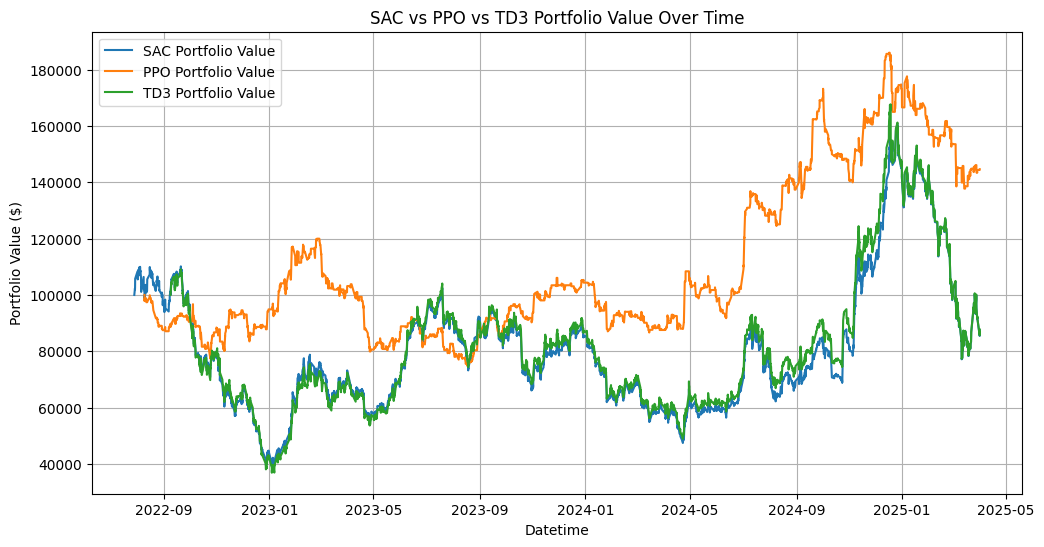

In [46]:
# ================================
# ✅ Plot Portfolio Value Comparison
# ================================
plt.figure(figsize=(12, 6))
results_df_sac['Date'] = pd.to_datetime(results_df_sac['Date'])
results_df_ppo['Date'] = pd.to_datetime(results_df_ppo['Date'])
results_df_td3['Date'] = pd.to_datetime(results_df_td3['Date'])

plt.plot(results_df_sac['Date'], results_df_sac['Portfolio Value'], label='SAC Portfolio Value')
plt.plot(results_df_ppo['Date'], results_df_ppo['Portfolio Value'], label='PPO Portfolio Value')
plt.plot(results_df_td3['Date'], results_df_td3['Portfolio Value'], label='TD3 Portfolio Value')
plt.xlabel('Datetime')
plt.ylabel('Portfolio Value ($)')
plt.title('SAC vs PPO vs TD3 Portfolio Value Over Time')
plt.legend()
plt.grid()
plt.show()
